In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

# This notebook is just to visualize some of the data needed for l2r with metadata

metadata = pd.read_csv("data/posts.csv")
users = pd.read_csv("data/users.csv")

#some feature engineering
today = datetime.today().date() 
metadata["creationdate"] = pd.to_datetime(metadata["creationdate"], errors='coerce')  # Keep datetime format
metadata["days_since_creation"] = (datetime.today() - metadata["creationdate"]).dt.days  # Extract only days
metadata["reputation_user"]= metadata["owneruserid"].map(users.set_index('id')['reputation'])
metadata = metadata[["id", "days_since_creation", "score", "viewcount", "favoritecount", "commentcount", "reputation_user"]]

#save in file with metadata
metadata.to_csv("data/metadata_processed.csv", index=False)
metadata.head()

,id,days_since_creation,score,viewcount,favoritecount,commentcount,reputation_user
0,12838370,4501.0,5,NaN,NaN,1,470180.0
1,12838371,4501.0,1,NaN,NaN,0,1664.0
2,12838372,4501.0,4,4038.0,0.0,0,1514.0
3,12838373,4501.0,4,969.0,0.0,0,7796.0
4,12838374,4501.0,0,NaN,NaN,0,293.0


In [27]:
metadata.describe()

,id,days_since_creation,score,viewcount,favoritecount,commentcount,reputation_user
count,1.000000e+04,9967.000000,10000.00000,3657.000000,1129.0,10000.000000,9.876000e+03
mean,1.300368e+07,4490.553928,3.95580,5335.530763,0.0,1.448600,3.970796e+04
std,3.916928e+04,2.522720,18.92684,27376.946199,0.0,2.226848,1.284518e+05
min,1.283837e+07,4488.000000,-8.00000,33.000000,0.0,0.000000,1.000000e+00
25%,1.298511e+07,4489.000000,0.00000,285.000000,0.0,0.000000,7.120000e+02
50%,1.301780e+07,4490.000000,1.00000,925.000000,0.0,1.000000,4.010500e+03
75%,1.303099e+07,4492.000000,3.00000,2839.000000,0.0,2.000000,1.971625e+04
max,1.304869e+07,4501.000000,587.00000,903140.000000,0.0,25.000000,1.457162e+06


Column id : 0 missing values
Column days_since_creation : 33 missing values


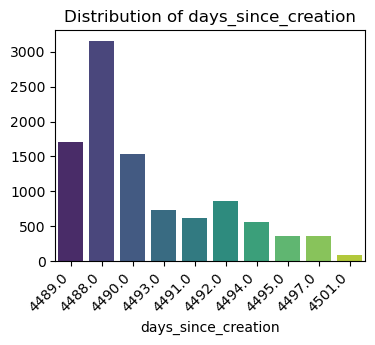

Column score : 0 missing values


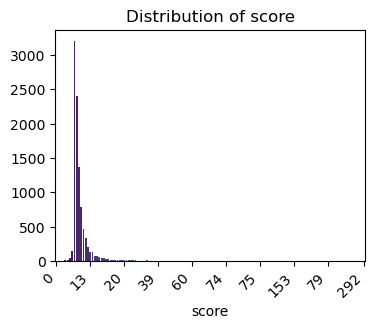

Column viewcount : 6343 missing values


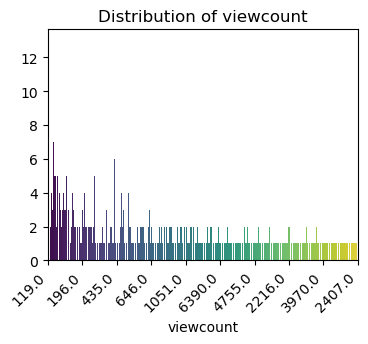

Column favoritecount : 8871 missing values


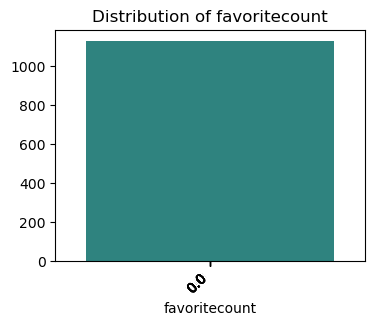

Column commentcount : 0 missing values


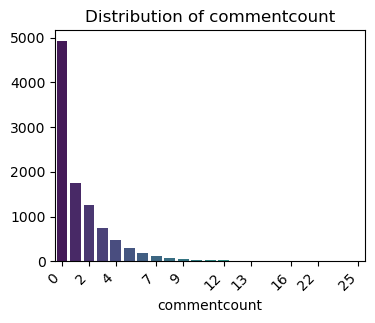

Column reputation_user : 124 missing values


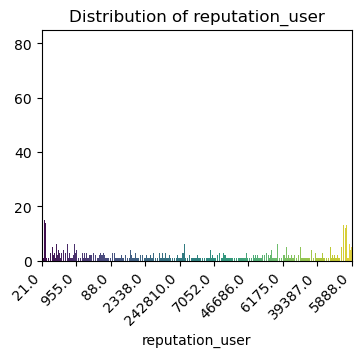

In [25]:
for col in metadata.columns:
    print(f"Column {col} : {metadata[col].isnull().sum()} missing values")
    if col!="id":
        plt.figure(figsize=(4, 3))
        value_counts = metadata[col].value_counts()
        sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        tick_indices = np.linspace(0, len(value_counts.index) - 1, num=10, dtype=int)
        plt.xticks(tick_indices, [value_counts.index[i] for i in tick_indices], rotation=45, ha="right", fontsize=10)
        plt.show()

#check again favorite_count
